In [22]:

from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
from datetime import datetime

In [28]:

tickers_dict = {'AMZN': 5, 'TSLA': 1, 'GOOG': 3, 'META': 3, 'KO': 10, 'PEP': 5, 
                'BA': 5, 'XOM': 5, 'CVX': 4, 'UNH': 1, 'JNJ': 3, 'JPM': 3, 
                'BAC': 5, 'C': 5, 'SPG': 10, 'AAPL': 6, 'MSFT': 5, 'WMT': 6, 
                'LMT': 2, 'PFE': 10, 'MMM': 3, 'DIS': 8, 'AIG': 5, 'BRK-B': 4,
                'SLB': 16, 'PLD': 5, 'AMD': 5,  'ISRG': 3, 'INTC': 5} 

tickers = tickers_dict.keys()
n_shares = tickers_dict.values()

In [29]:


#scrape data
url_1 = "https://finviz.com/quote.ashx?t="
scrape_news_tab = {}

for ticker in tickers:
    url_2 = url_1 + ticker
    ticker_req =  Request(url = url_2, headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Safari/605.1.15'})
    response = urlopen(ticker_req)
    #extract into html
    html = BeautifulSoup(response)
    #find and load news_table
    news_table = html.find(id = 'news-table')
    #add table to dictionary
    scrape_news_tab[ticker] = news_table

parsed_news = []
#news iteration
for file_name, news_table in scrape_news_tab.items():
    #iterate through all tr tags
    for x in news_table.findAll('tr'):
        text = x.a.get_text() #read text from each a tag under tr tag
        date_scrape = x.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0] #to make sure all news time for a given date is taken
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        ticker = file_name.split('_')[0]
        parsed_news.append([ticker, date, time, text])


parsed_news[:5]

[['AMZN',
  'Today',
  '05:50PM',
  "Amazon's New Streaming Move Could Change How You Watch TV"],
 ['AMZN',
  'Today',
  '05:42PM',
  'Amazon, BlackRock announce first round of layoffs in 2024'],
 ['AMZN',
  'Today',
  '05:16PM',
  'Amazon lays off workers from Prime Video, MGM Studios, Twitch'],
 ['AMZN',
  'Today',
  '04:37PM',
  'Amazon to make no concessions to EU on $1.4 bln iRobot deal - Politico'],
 ['AMZN',
  'Today',
  '03:25PM',
  'Walmart is promising a Jetsons-like future at CES. Delivering that will be tricky']]

In [25]:
# NLTK VADER for sentiment analysis
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arminbajrica/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()
columns = ['ticker', 'date', 'time', 'headline']
news_df = pd.DataFrame(parsed_news, columns=columns)
print(news_df)
news_df.info()
news_df.info()
print(news_df)
def convert_to_date(date_str):
    if date_str == 'Today':
        return datetime.today().date()
    else:
        try:
            return datetime.strptime(date_str, '%Y-%m-%d').date()
        except ValueError:
            return datetime.strptime(date_str, '%b-%d-%y').date()

news_df['date'] = news_df['date'].apply(convert_to_date)
scores = news_df['headline'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
news_df = news_df.join(scores_df, rsuffix='_right')
        
news_df['date'] = pd.to_datetime(news_df.date).dt.date
news_df.tail()

Empty DataFrame
Columns: [ticker, date, time, headline]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    0 non-null      object
 1   date      0 non-null      object
 2   time      0 non-null      object
 3   headline  0 non-null      object
dtypes: object(4)
memory usage: 124.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ticker    0 non-null      object
 1   date      0 non-null      object
 2   time      0 non-null      object
 3   headline  0 non-null      object
dtypes: object(4)
memory usage: 124.0+ bytes
Empty DataFrame
Columns: [ticker, date, time, headline]
Index: []


,ticker,date,time,headline


In [27]:

print(news_df.groupby(['ticker']))
mean_scores = news_df.groupby(['ticker'])
mean_df = news_df.loc[:,['ticker', 'neg', 'neu', 'pos', 'compound']].groupby(['ticker']).mean()
print(mean_df)




KeyError: "['neg', 'neu', 'pos', 'compound'] not in index"

In [7]:

tickerdata = yf.Ticker('GOOG')
tickerdata.info

{'address1': '1600 Amphitheatre Parkway',
 'city': 'Mountain View',
 'state': 'CA',
 'zip': '94043',
 'country': 'United States',
 'phone': '650 253 0000',
 'website': 'https://www.abc.xyz',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Alphabet Inc. offers various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment provides products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; 

In [30]:

sectors = []
industries = []
prices = []
for ticker in tickers:
    print(ticker)
    tickerdata = yf.Ticker(ticker)
    prices.append(tickerdata.info.get('regularMarketPrice', tickerdata.info.get('currentPrice')))
    sectors.append(tickerdata.info.get('sector'))
    industries.append(tickerdata.info.get('industry'))

d = {'ticker': tickers, 'Sector': sectors, 'Industry': industries, 'Price': prices, 'No. of Shares': n_shares}
df_info = pd.DataFrame(data=d).set_index('ticker')


AMZN
TSLA
GOOG
META
KO
PEP
BA
XOM
CVX
UNH
JNJ
JPM
BAC
C
SPG
AAPL
MSFT
WMT
LMT
PFE
MMM
DIS
AIG
BRK-B
SLB
PLD
AMD
ISRG
INTC


In [15]:

df_info['Total Stock Value in Portfolio'] = df_info['Price']*df_info['No. of Shares']
print(df_info)

                        Sector                        Industry     Price  \
ticker                                                                     
AMZN         Consumer Cyclical                 Internet Retail  153.3050   
TSLA         Consumer Cyclical              Auto Manufacturers  232.9500   
GOOG    Communication Services  Internet Content & Information  143.5700   
META    Communication Services  Internet Content & Information  370.5100   
KO          Consumer Defensive       Beverages - Non-Alcoholic   60.2200   
PEP         Consumer Defensive       Beverages - Non-Alcoholic  166.7050   
BA                 Industrials             Aerospace & Defense  227.7700   
XOM                     Energy            Oil & Gas Integrated   98.4750   
CVX                     Energy            Oil & Gas Integrated  144.5801   
UNH                 Healthcare                Healthcare Plans  537.7739   
JNJ                 Healthcare    Drug Manufacturers - General  161.7800   
JPM         

In [16]:

df = mean_df.merge(df_info, left_index=True, right_index=True)

df = df.rename(columns={"compound": "Sentiment Score", "neg": "Negative", "neu": "Neutral", "pos": "Positive"})
df = df.reset_index()
df.head()
print(df)

            neg      neu      pos  compound                  Sector  \
ticker                                                                
AAPL    0.05230  0.83567  0.11203  0.108418              Technology   
AIG     0.02249  0.86269  0.11484  0.155570      Financial Services   
AMD     0.01634  0.84440  0.13925  0.204235              Technology   
AMZN    0.04339  0.75616  0.20043  0.231692       Consumer Cyclical   
BA      0.09606  0.83572  0.06823 -0.064605             Industrials   
BAC     0.02955  0.87319  0.09725  0.123370      Financial Services   
BRK-B   0.05353  0.84034  0.10616  0.069860      Financial Services   
C       0.05237  0.87120  0.07643  0.057144      Financial Services   
CVX     0.07412  0.81226  0.11364  0.049031                  Energy   
DIS     0.07593  0.84978  0.07427 -0.009016  Communication Services   
GOOG    0.03544  0.83546  0.12909  0.169856  Communication Services   
INTC    0.02881  0.87615  0.09503  0.114835              Technology   
ISRG  

In [17]:

import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px

   ticker  Negative  Neutral  Positive  Sentiment Score  \
0    AAPL   0.05230  0.83567   0.11203         0.108418   
1     AIG   0.02249  0.86269   0.11484         0.155570   
2     AMD   0.01634  0.84440   0.13925         0.204235   
3    AMZN   0.04339  0.75616   0.20043         0.231692   
4      BA   0.09606  0.83572   0.06823        -0.064605   
5     BAC   0.02955  0.87319   0.09725         0.123370   
6   BRK-B   0.05353  0.84034   0.10616         0.069860   
7       C   0.05237  0.87120   0.07643         0.057144   
8     CVX   0.07412  0.81226   0.11364         0.049031   
9     DIS   0.07593  0.84978   0.07427        -0.009016   
10   GOOG   0.03544  0.83546   0.12909         0.169856   
11   INTC   0.02881  0.87615   0.09503         0.114835   
12   ISRG   0.02085  0.86483   0.11434         0.158836   
13    JNJ   0.03674  0.82713   0.13614         0.135704   
14    JPM   0.04404  0.86435   0.09161         0.087552   
15     KO   0.03343  0.79048   0.17609         0.209408 

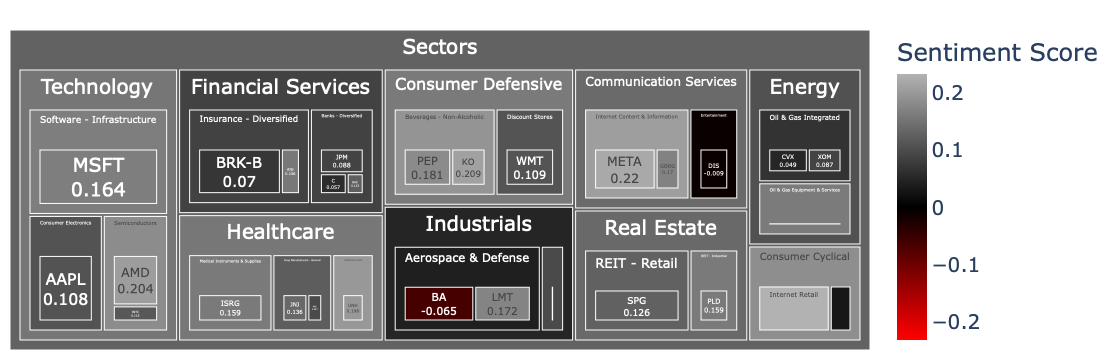

In [18]:
print(df)

fig = px.treemap(df, path=[px.Constant("Sectors"), 'Sector', 'Industry', 'ticker'], values='Total Stock Value in Portfolio',
                  color='Sentiment Score', hover_data=['Price', 'Negative', 'Neutral', 'Positive', 'Sentiment Score'],
                  color_continuous_scale=['#FF0000', "#000000", '#b2b2b2'],
                  color_continuous_midpoint=0)

fig.data[0].customdata = df[['Price', 'Negative', 'Neutral', 'Positive', 'Sentiment Score']].round(3)
fig.data[0].texttemplate = "%{label}<br>%{customdata[4]}"

fig.update_traces(textposition="middle center")
fig.update_layout(margin = dict(t=30, l=10, r=10, b=10), font_size=20)

plotly.offline.plot(fig, filename='stock_sentiment.html') 
fig.show()